In [15]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm

In [16]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [17]:
file1.keys(filter_name='*trk*')

['rec.reco.ntrk',
 'rec.reco.shw.truth.visEintrk',
 'rec.reco.stub.planes.trkpitch',
 'rec.reco.stub.truth.visEintrk',
 'rec.reco.trk..length',
 'rec.reco.trk.ID',
 'rec.reco.trk.bestplane',
 'rec.reco.trk.calo.0.charge',
 'rec.reco.trk.calo.0.ke',
 'rec.reco.trk.calo.0.nhit',
 'rec.reco.trk.calo.0.points..length',
 'rec.reco.trk.calo.0.points..totarraysize',
 'rec.reco.trk.calo.0.points.dedx',
 'rec.reco.trk.calo.0.points.dqdx',
 'rec.reco.trk.calo.0.points.integral',
 'rec.reco.trk.calo.0.points.pitch',
 'rec.reco.trk.calo.0.points.rr',
 'rec.reco.trk.calo.0.points.sumadc',
 'rec.reco.trk.calo.0.points.t',
 'rec.reco.trk.calo.0.points.wire',
 'rec.reco.trk.calo.0.points..idx',
 'rec.reco.trk.calo.1.charge',
 'rec.reco.trk.calo.1.ke',
 'rec.reco.trk.calo.1.nhit',
 'rec.reco.trk.calo.1.points..length',
 'rec.reco.trk.calo.1.points..totarraysize',
 'rec.reco.trk.calo.1.points.dedx',
 'rec.reco.trk.calo.1.points.dqdx',
 'rec.reco.trk.calo.1.points.integral',
 'rec.reco.trk.calo.1.points.

In [18]:

lengths= file1['rec.reco.trk.calo.0.points..length'].array()
t= file1['rec.reco.trk.calo.0.points..totarraysize'].array()

length_index= []
for i in range(len(lengths)):
    index= [0]
    sum= 0
    for j in lengths[i]:
        if j == 0:
            continue
        index.append(sum+j-1)
        sum+= j
    
    length_index.append(index)

In [19]:
def get_cut(start, end):
    cut_xf= (np.absolute(end['xf'])<200)    
    cut_yf= (np.absolute(end['yf'])<200)
    cut_zf0= (end['zf'])>0
    cut_zf1= (end['zf'])<500

    cut_x0= (np.absolute(start['x0'])<200) 
    cut_y0= (np.absolute(start['y0'])<200)
    cut_z00= (start['z0'])>0
    cut_z01= (start['z0'])<500

    cut_full= cut_xf & cut_yf & cut_zf0 & cut_zf1 & cut_x0 & cut_y0 & cut_z00 & cut_z01 
    cut= np.full(ak.num(cut_full, axis=0), True)

    for i in range(ak.num(cut_full, axis=0)):
        for j in range(ak.num(cut_full)[i]):
            if cut_full[i][j]== False:
                cut[i]= False

    return cut, cut_full

In [20]:
start1= file1.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end1= file1.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})
rr_1= file1['rec.reco.trk.calo.2.points.rr'].array()
dedx_1= file1['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start2= file2.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end2= file2.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})
rr_2= file2['rec.reco.trk.calo.2.points.rr'].array()
dedx_2= file2['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start3= file3.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end3= file3.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})   
rr_3= file3['rec.reco.trk.calo.2.points.rr'].array()
dedx_3= file3['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start4= file4.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end4= file4.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'})  
rr_4= file4['rec.reco.trk.calo.2.points.rr'].array()
dedx_4= file4['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
start5= file5.arrays(['x0','y0','z0'], aliases={'x0':'rec.reco.trk.start.x', 
                                     'y0':'rec.reco.trk.start.y',
                                     'z0':'rec.reco.trk.start.z'})
end5= file5.arrays(['xf','yf','zf'], aliases={'xf':'rec.reco.trk.end.x', 
                                    'yf':'rec.reco.trk.end.y',
                                     'zf':'rec.reco.trk.end.z'}) 
rr_5= file5['rec.reco.trk.calo.2.points.rr'].array()
dedx_5= file5['rec.reco.trk.calo.2.points.dedx'].array()

In [21]:
cut_1, cutfull_1= get_cut(start1, end1)
cut_2, cutfull_2= get_cut(start2, end2)
cut_3, cutfull_3= get_cut(start3, end3)
cut_4, cutfull_4= get_cut(start4, end4)
cut_5, cutfull_5= get_cut(start5, end5)

In [22]:
rr= ak.flatten(ak.concatenate([rr_1[cut_1], rr_2[cut_2], rr_3[cut_3], rr_4[cut_4], rr_5[cut_5]], axis=0)).to_numpy()
dedx= ak.flatten(ak.concatenate([dedx_1[cut_1], dedx_2[cut_2], dedx_3[cut_3], dedx_4[cut_4], dedx_5[cut_5]], axis=0)).to_numpy()

remove= np.where((dedx>50)|(rr>25))
rr= np.delete(rr, remove)
dedx= np.delete(dedx, remove)

In [35]:
for i in range(len(cutfull_1)):
    array_len= len(cutfull_1)
    if array_len==1:
        pass
    if array_

IndentationError: expected an indented block (2248379782.py, line 3)

[True, True, True, True, True]

(array([[2., 1., 2., ..., 0., 0., 0.],
        [1., 3., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([ 0.04550305,  0.29444882,  0.5433946 ,  0.79234037,  1.04128615,
         1.29023193,  1.5391777 ,  1.78812348,  2.03706925,  2.28601503,
         2.53496081,  2.78390658,  3.03285236,  3.28179813,  3.53074391,
         3.77968969,  4.02863546,  4.27758124,  4.52652701,  4.77547279,
         5.02441857,  5.27336434,  5.52231012,  5.77125589,  6.02020167,
         6.26914745,  6.51809322,  6.767039  ,  7.01598477,  7.26493055,
         7.51387633,  7.7628221 ,  8.01176788,  8.26071365,  8.50965943,
         8.75860521,  9.00755098,  9.25649676,  9.50544253,  9.75438831,
        10.00333408, 10.25227986, 10.50122564, 10.75017141, 10.99911719,
        11.24806296, 11.49700874, 11.74595452, 11.99490029, 12.24384607,
        12.49279184, 

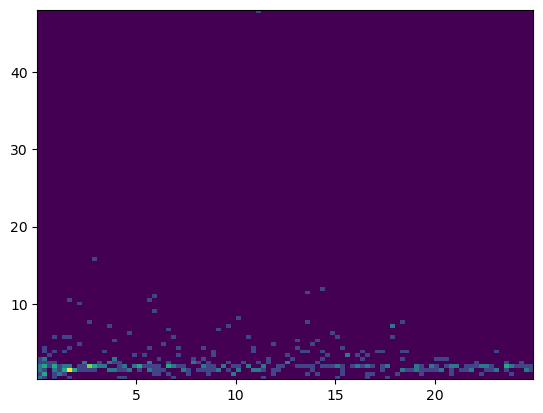

In [24]:
plt.hist2d(rr, dedx, bins=100)

In [25]:
lengths

<Array [[0], [89, ...], ..., [54, 79, 0, 0, 0, 0, 0]] type='4816 * var * int32'>

In [26]:
length_index

[[0],
 [0, 88, 129, 156, 192],
 [0, 25, 71],
 [0, 43, 74, 129],
 [0, 91, 184],
 [0],
 [0],
 [0],
 [0, 32],
 [0],
 [0, 15],
 [0, 69],
 [0, 51, 105, 202],
 [0, 60, 116],
 [0, 63, 69, 153, 164, 172, 212],
 [0, 96, 108],
 [0, 80],
 [0, 48],
 [0, 68, 163, 212],
 [0],
 [0, 20, 38, 42],
 [0, 87, 106, 109],
 [0, 75],
 [0, 44, 87],
 [0, 96, 108],
 [0],
 [0, 23, 41, 59],
 [0, 76, 104],
 [0],
 [0],
 [0, 52, 143, 178],
 [0, 24, 29],
 [0, 57, 68],
 [0, 72, 136, 209],
 [0, 47, 130, 140, 219, 306],
 [0, 47],
 [0, 72, 149, 195, 219, 222, 264],
 [0, 85, 153, 174],
 [0, 21, 68],
 [0, 72, 153, 183],
 [0, 53],
 [0, 80, 90],
 [0],
 [0, 34, 39, 97, 130],
 [0, 56, 71],
 [0],
 [0],
 [0, 18, 25],
 [0],
 [0, 85, 89],
 [0, 31, 38],
 [0],
 [0, 15, 29, 39, 76],
 [0],
 [0, 52],
 [0, 6],
 [0],
 [0],
 [0, 89, 139, 212, 284, 359, 379, 384],
 [0],
 [0, 58],
 [0, 9, 91, 118],
 [0, 7, 56, 64, 126],
 [0, 82, 147],
 [0],
 [0],
 [0],
 [0, 82],
 [0, 79],
 [0, 97, 111, 119],
 [0, 92, 148, 154],
 [0, 32, 98, 119, 131],
 [0],
 

In [27]:

for i in range(len(dedx_1)):
    index= length_index[i]
    

    # Loop to get array of tracks
    for j in range(len(index)):
        if j == len(index)-1:
            continue
        print(index[j]+1, index[j+1])
        # print(dedx_1[i][ index[j]+1 : index[j+1] ])
    print('finish loop')

print(len(dedx_1[1]))


finish loop
1 88
89 129
130 156
157 192
finish loop
1 25
26 71
finish loop
1 43
44 74
75 129
finish loop
1 91
92 184
finish loop
finish loop
finish loop
finish loop
1 32
finish loop
finish loop
1 15
finish loop
1 69
finish loop
1 51
52 105
106 202
finish loop
1 60
61 116
finish loop
1 63
64 69
70 153
154 164
165 172
173 212
finish loop
1 96
97 108
finish loop
1 80
finish loop
1 48
finish loop
1 68
69 163
164 212
finish loop
finish loop
1 20
21 38
39 42
finish loop
1 87
88 106
107 109
finish loop
1 75
finish loop
1 44
45 87
finish loop
1 96
97 108
finish loop
finish loop
1 23
24 41
42 59
finish loop
1 76
77 104
finish loop
finish loop
finish loop
1 52
53 143
144 178
finish loop
1 24
25 29
finish loop
1 57
58 68
finish loop
1 72
73 136
137 209
finish loop
1 47
48 130
131 140
141 219
220 306
finish loop
1 47
finish loop
1 72
73 149
150 195
196 219
220 222
223 264
finish loop
1 85
86 153
154 174
finish loop
1 21
22 68
finish loop
1 72
73 153
154 183
finish loop
1 53
finish loop
1 80
81 90
